## Dataset generation from deformable mirror and a diffuser

A simple ground glass diffuser is used



### Imports

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.devices import CircularDiffuser
from mmfsim.datasets import SimulatedDiffuserDataset

### Dataset for a single wavelength diffusion

In [28]:
grid_settings = dict(
    pixel_size = 0.5e-6,
    pixel_numbers = (256, 256),
)
diffuser_settings = dict(
    num_pixels=grid_settings['pixel_numbers'],
    pixel_size=grid_settings['pixel_size'],
    sigma=2e-6,
    depth_range=2e-6,
    wavelength=1064e-9,
    radius=50e-6,
)
fresnel_settings = dict(
    delta_z=100e-6,
    pad=2,
)
dataset_settings = dict(
    wavelength = 1064e-9,
    length = 10,
)
export_settings = dict(
    file_type = 'hdf5',
    max_fields_per_file = 10000,
)

dataset_lengths: list[int] = [5000, 5000]
dataset_actuators: list[int] = [4, 8, 12, 16, 20, 24, 32]

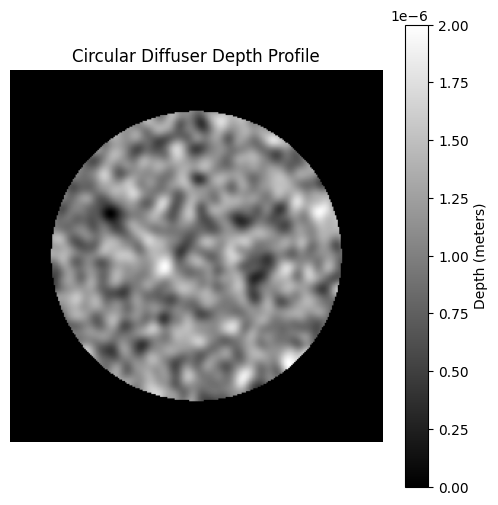

In [29]:
grid = Grid(**grid_settings)

diffuser = CircularDiffuser(**diffuser_settings)
diffuser.plot_diffuser()

In [31]:
dataset = SimulatedDiffuserDataset(
    diffuser=diffuser,
    grid=grid,
    **dataset_settings,
)
dataset.compute(phases_dim=(6, 6))
dataset.compute_fresnel_transforms(**fresnel_settings)

1.064e-06
Computed couple 1/10
Computed couple 2/10
Computed couple 3/10
Computed couple 4/10
Computed couple 5/10
Computed couple 6/10
Computed couple 7/10
Computed couple 8/10
Computed couple 9/10
Computed couple 10/10
Computed Fresnel 1/10
Computed Fresnel 2/10
Computed Fresnel 3/10
Computed Fresnel 4/10
Computed Fresnel 5/10
Computed Fresnel 6/10
Computed Fresnel 7/10
Computed Fresnel 8/10
Computed Fresnel 9/10
Computed Fresnel 10/10


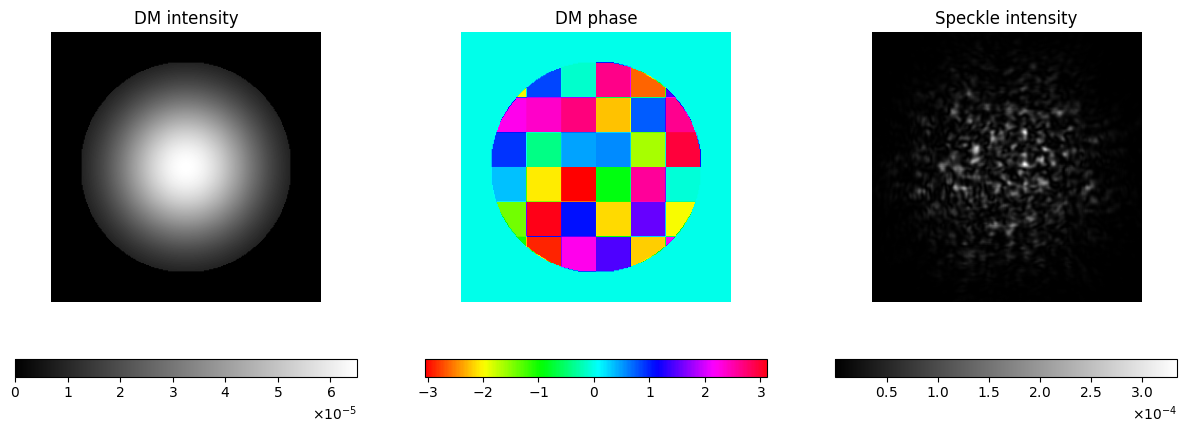

In [56]:
dataset.plot_example()

In [57]:
dataset.export()

Dataset saved: .\synth_diffuser_dset_lambda=1064nm_dm=6x6_dz=100um_len=10.mat
